In [37]:
import ijson
import pandas as pd
# import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 6)
pylab.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [38]:
# locate the 6 years of Inc 5000 data
f16 = "json_data/inc5000_2016.json"
f15 = "json_data/inc5000_2015.json"
f14 = "json_data/inc5000_2014.json"
f13 = "json_data/inc5000_2013.json"
f12 = "json_data/inc5000_2012.json"
f11 = "json_data/inc5000_2011.json"

In [39]:
# identify the columns for the dataframe
good_columns = [
    "city",
    "state_l",
    "metro",
    "revenue",
    "url",
    "industry",
    "workers",
    "rank",
    "id",
    "yrs_on_list",
    "growth",
    "ifmid",
    "ifiid",
    "state_s",
    "company"
]

In [40]:
data = []
with open(f12, 'r') as f:
    for item in ijson.items(f, "item"):
        data.append(item.values())
df = pd.DataFrame(data, columns = good_columns)

In [41]:
affordable = df[(df['revenue'] > 999999) & (df['revenue'] < 29999999)]
affordable.shape

(3795, 15)

In [42]:
agencies = affordable[(affordable['industry'] == "Advertising & Marketing")]
agencies.shape

(381, 15)

In [43]:
profitable_agencies = agencies[['company','revenue','workers','growth']]
# profitable_agencies['profitability']= profitable_agencies.Action.apply(profitable_agencies.revenue/profitable_agencies.workers)
profitable_agencies['profitability']= profitable_agencies.revenue/profitable_agencies.workers
profitable_agencies.sort(['profitability'], ascending = False, inplace = True)
profitable_agencies

,company,revenue,workers,growth,profitability
1791,C2C Outdoor,20952011,8,156.9025,2619001
1401,Spark Revenue,9903346,4,213.9465,2475836
2367,StoreBoard Media,9538909,6,104.4475,1589818
110,Convert2Media,24658654,16,2726.3169,1541166
174,Day Online Solutions,2667644,2,1949.1335,1333822
1546,LeadPile,25201341,19,191.0998,1326386
421,Deluxe Marketing,11931328,9,879.705,1325703
305,Round Sky,7288718,6,1212.2871,1214786
752,Diablo Media,20353708,18,462.2556,1130762
1696,Travelers Marketing,14382296,13,169.0578,1106330


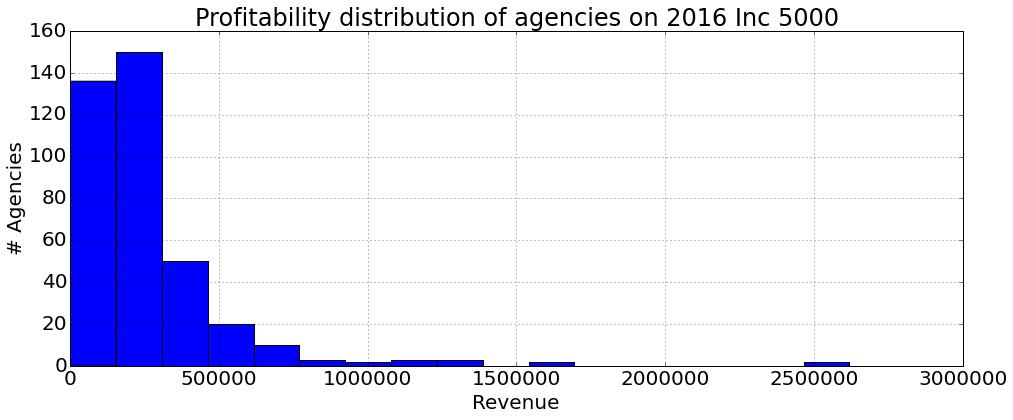

In [44]:
profit_plot=profitable_agencies['profitability'].hist(bins=17)
profit_plot.set_title('Finding the profitability zone')
profit_plot.set_title("Profitability distribution of agencies on 2016 Inc 5000")
profit_plot.set_xlabel("Revenue")
profit_plot.set_ylabel("# Agencies")

In [45]:
highly_profitable = profitable_agencies[(profitable_agencies['profitability'] > 249999) & (profitable_agencies['profitability'] < 500000)]
# affordable = df[(df['revenue'] > 999999) & (df['revenue'] < 29999999)]
# affordable.shape
highly_profitable.shape

(92, 5)

In [46]:
highly_profitable.company

25                Leadnomics
3525               Mindpower
192                  Prodege
4736        RedPeg Marketing
2502                  Sensis
4933      Direct Innovations
1807    Good Solutions Group
1631                 Agent X
171           Local Leads HQ
801              Steel Media
1695              Division-D
4454         Preferred Group
3652            Intermarkets
2761                 Beck Ag
725         Harvest Creative
...
1985              ClickMail Marketing
3480                         Edvisors
4100              Pinckney Hugo Group
3241    Customer Communications Group
569                   TriMark Digital
4308        Proforma Graphic Services
2714                       AMP Agency
3474          LeadDog Marketing Group
427                   WebMarketing123
3478              Brighter Collective
4197                    Gerard Design
1046                      Focus Media
3876                     SmartRevenue
4122                          Taradel
575                          

In [47]:
highly_profitable.company.to_csv('csv_data/2012_profitable.csv')

UnicodeEncodeError: 'ascii' codec can't encode character u'\xe9' in position 2: ordinal not in range(128)